[View in Colaboratory](https://colab.research.google.com/github/xenov/persepolis/blob/master/scikit_learn_SVM.ipynb)

In [4]:
# https://qiita.com/kazuki_hayakawa/items/18b7017da9a6f73eba77#%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%A8%E3%81%AF

!pip install sklearn
!pip install mlxtend

In [0]:
# -*- coding: utf-8 -*-
%matplotlib inline

#必要なライブラリを import 
from sklearn import datasets
import numpy as np

# アヤメデータセットを用いる
iris = datasets.load_iris()

# 例として、3,4番目の特徴量の2次元データで使用
X = iris.data[:, [2,3]]
#クラスラベルを取得
y = iris.target

In [0]:
# データの前処理
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

# 訓練データを70%テストデータを30とする%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


(150, 2)


### SVM

In [0]:
from sklearn.svm import SVC
# 線形SVMのインスタンスを生成する
model = SVC(kernel='linear', random_state=None)

# モデルの学習
model.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
# 精度が知りたい
from sklearn.metrics import accuracy_score
# 予測
pred_train = model.predict(X_train_std)

accuracy_train = accuracy_score(y_train, pred_train)
accuracy_train

0.9619047619047619

### 表にしたい

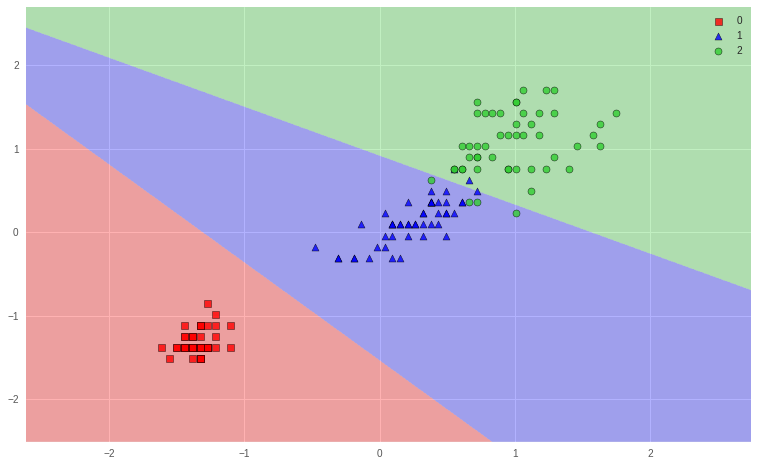

In [0]:
#分類結果を図示する
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_combined_std, y_combined, clf=model,  res=0.02)
plt.show()

# URL使ってやってみる

In [12]:
import google.colab
f = google.colab.files.upload()

Saving urldata1000.csv to urldata1000 (2).csv


### Colabでのファイル入力関数

In [0]:
def get_data_from_colab_files(files, keyword):
  """
  Args:
    files: file manage object
    keyword: the filename
  Returns:
    _x: data, numpy arrayb
    _y: label
  """
  import numpy as np
  
  def int_cast(str_list):
    return [int(x) for x in str_list]
  
  _x = [] #URLの件数分の，評価ツール検査結果
  _y = [] #URLの件数分のラベル(正答)
  
  file_str_list = f[keyword].decode('utf-8').split('\n')  # byte文字列なのでコード指定でデコード
  print(file_str_list)
  file_str_list = file_str_list[0:-1]
  for row in file_str_list:
    nums = row.split(',')
    nums = int_cast(nums)
    t = [] #66件の評価ツールをいれる
    for i in range(66):
      if nums[i] == '1' or nums[i] == 1:
        t.append(np.asarray([0, 1], dtype=np.float32)) #True(0) -> [0, 1]
      else:
        t.append(np.asarray([1, 0], dtype=np.float32)) #False(0) ->[1, 0]
    _x.append(t)
    if nums[66] == 1 or nums[66] == '1' or nums[66] == '1\n': #ラベル
      _y.append(np.asarray([0], dtype=np.float32))
    else:
      _y.append(np.asarray([1], dtype=np.float32))
      
  _x = np.asarray(_x, dtype=np.float32)  # 配列をnumpy配列にする
  _x = np.reshape(_x, (-1, 132))
  _y = np.asarray(_y, dtype=np.float32)
  _y = np.reshape(_y, (-1,1))
  print(_x.shape, _y.shape)
  return _x, _y

In [39]:
x, y = get_data_from_colab_files(f, "urldata1000.csv")
# true_x ,true_y =  get_data_from_colab_files(f, "true.csv")
# false_x ,false_y =  get_data_from_colab_files(f, "false.csv")

['1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0\r', '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\r', '1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,0\r', '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\r', '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0\r', '1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0\r', '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0\r', '1,1,1,1,1,0,1,1,1,1,1,1,1

(1000, 132) (1000, 1)


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import cross_val_score

# 訓練データ(70%)とテストデータ(30%)を分割
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# 線形SVMやるよ～
clf = svm.SVC(kernel='linear', random_state=None).fit(X_train, y_train)
# cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Average cross-validation score: {:.2f}'.format(scores.mean()))
scores

Average cross-validation score: 0.98


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.97142857, 0.97142857, 0.98571429, 0.97142857, 1.        ,
       0.98571429, 0.98571429, 0.98571429, 1.        , 0.98571429])

cv=3
Average cross-validation score: 0.98
array([0.97008547, 0.98717949, 0.99137931])

cv=4
Average cross-validation score: 0.99
array([0.97727273, 0.99431818, 0.98850575, 0.98850575])

cv=5
Average cross-validation score: 0.99
array([0.97142857, 0.99285714, 0.99285714, 0.98571429, 0.99285714])

cv=6
Average cross-validation score: 0.99
array([0.97457627, 0.98305085, 0.99137931, 0.98275862, 0.99137931,
       0.99137931])
       
cv=7
Average cross-validation score: 0.98
array([0.97, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99])

cv=8
Average cross-validation score: 0.99
array([0.96590909, 0.98863636, 0.97727273, 1.        , 0.98863636,
       0.98863636, 0.98837209, 0.98837209])
       
cv=9
Average cross-validation score: 0.99
array([0.97435897, 0.97435897, 0.98717949, 0.98717949, 0.98717949, 0.98717949, 0.98717949, 1.        , 0.98684211])  
       
cv=10
Average cross-validation score: 0.98
array([0.97142857, 0.97142857, 0.98571429, 0.97142857, 1.        ,
       0.98571429, 0.98571429, 0.98571429, 1.        , 0.98571429])
       

In [68]:
from sklearn.metrics import accuracy_score

pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_train

0.9985714285714286

In [19]:
 #分類結果を図示する
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

X_combined_std = np.vstack((x, x_test))
y_combined = np.vstack((y, y_test))

# fig = plt.figure(figsize=(13,8))
# plot_decision_regions(X_combined_std, np.reshape(y_combined.astype(np.integer), [-1]), clf=model,  res=0.02)
# plot.show()

NameError: ignored